# Dashboard Idea

This is a notebook that was created early on in data exploration that didn't really go anywhere, but it has some interesting plots at the end.

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statistics
import numpy as np

#### Importing dataframes

In [2]:
full=pd.read_csv("../bmgwd9/cleaned_data_f60c50y73i3.csv") #reading the full data csv 
cont=pd.read_csv("/dsa/groups/capstonesp2022/online/group_3/M3/CountryContinents.csv") #reading the continent csv 

#### Joining the two datasets to assign continent values to each country then listing all available countries

In [3]:
comb=cont.merge(full, how='inner', right_on="CountryCode", left_on='ISO-alpha3 Code') #Doing an inner join using countrycode and iso-alpha3 code
comb=comb.iloc[:,3:] #Cutting the columns that were duplicated in the join
[x for x in comb['CountryName'].unique()] #Listing all country names so the user knows what to put below

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Hong Kong SAR, China',
 'Macao SAR, China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Congo, Dem. Rep.',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guine

#### Establishing which metrics and country to use then giving a preview of the data to ensure parameters populated

In [8]:
mets=['SPPOPGROW', 'SPDYNTFRTIN', 'POPCAGR5'] #Setting the list of metrics to evaluate
country="United States" #Setting the country name
dfcut=comb[comb['CountryName']==country].loc[:,['Continent', 'CountryName', 'CountryCode', 'Year']+mets].reset_index(drop=True) #Pulling the needed columns plus the ones designated above into a new dataframe, dfcut
dfcut.head() #Previewing the data to ensure everything worked

,Continent,CountryName,CountryCode,Year,SPPOPGROW,SPDYNTFRTIN,POPCAGR5
0,North America,United States,USA,1973,0.954477,1.879,0.010922
1,North America,United States,USA,1974,0.913660,1.835,0.010794
2,North America,United States,USA,1975,0.985986,1.774,0.010432
3,North America,United States,USA,1976,0.950220,1.738,0.009797
4,North America,United States,USA,1977,1.005772,1.790,0.009667


#### Plotting the results

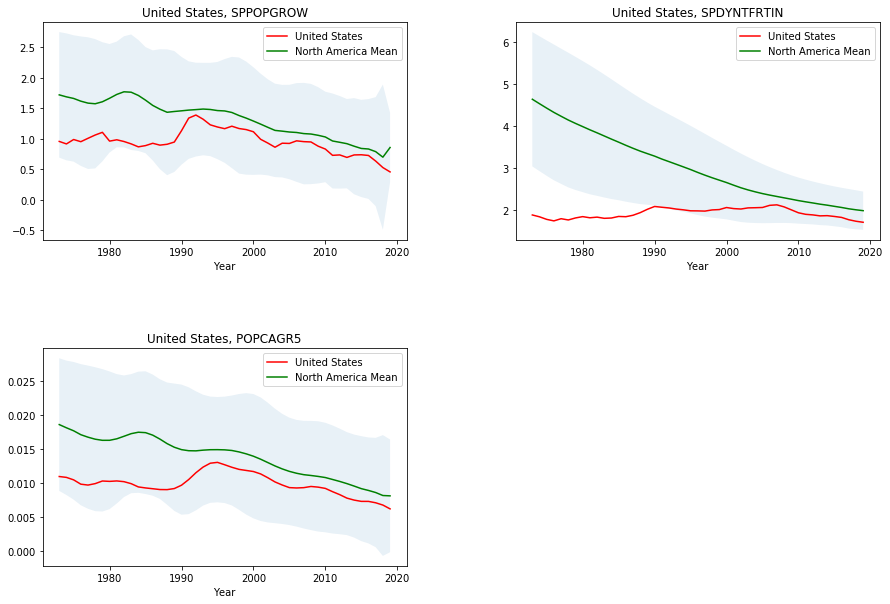

In [9]:
rows=int(len(mets)/2+1) if len(mets)%2==1 else int(len(mets)/2) #Setting the number of rows needed using remainder
fig = plt.figure(figsize=(15,5*rows)) #Setting a variable height based on the number of rows needed
fig.subplots_adjust(hspace=.5, wspace=0.3) #Establishing the plot and setting spacing

cnt=1 #Implementing a counter
for metric in mets: #Iterating through the list of metrics established above
    ax = fig.add_subplot(str(rows)+"2"+str(cnt)) #Setting the position of the subplot with a syntax of (how many rows, how many columns, which position)
    cont_mean=[] #creating a blank list to collect yearly means
    cont_sd=[] #creating a blank list to collect yearly SDs
    for a in dfcut['Year'].unique(): #iterating through the list of unique years
        cont_mean.append(statistics.mean([y for y in comb[(comb['Continent']==comb[comb['CountryName']==country].reset_index(drop=True).loc[0]['Continent']) & (comb['Year']==a)][metric] if y != -999])) #Calculating the mean for all records that match the target country's continent in the desired year so long as the value isn't -999 (missing value replacment)
        cont_sd.append(statistics.stdev([y for y in comb[(comb['Continent']==comb[comb['CountryName']==country].reset_index(drop=True).loc[0]['Continent']) & (comb['Year']==a)][metric] if y != -999])) #Calculating the SD for all records that match the target country's continent in the desired year so long as the value isn't -999 (missing value replacment)
    sns.lineplot(x='Year', y=metric, data=dfcut, color='red', label=country).set(Ylabel=None, title=dfcut['CountryName'][0]+", "+metric) #Plotting the country's values
    sns.lineplot(x='Year', y=cont_mean, data=dfcut, color='green', label=dfcut['Continent'][0]+" "+'Mean').fill_between(x='Year', y1=np.array(cont_mean)-np.array(cont_sd), y2=np.array(cont_mean)+np.array(cont_sd), data=dfcut).set(alpha=.1) #Plotting the continent mean and filling the area above and below the mean equal to the SD
    cnt+=1 #iterating the count to proceed to the next record

plt.legend() #showing the legend
plt.show() #plotting